[[0.982387 0.891061 0.975524 0.78866  0.647303 0.652968 0.960148 0.991803
  0.857143]
 [0.99454  0.903207 0.977391 0.885437 0.717557 0.714597 0.962617 0.945312
  0.857143]
 [0.99232  0.895206 0.98087  0.701458 0.695238 0.026756 0.800616 0.987755
  0.666667]
 [0.991632 0.880296 0.927632 0.874754 0.697059 0.621495 0.963031 0.979253
  0.857143]]
['WWW' 'MAIL' 'FTP-CONTROL' 'FTP-PASV' 'P2P' 'DATABASE' 'FTP-DATA'
 'SERVICES' 'INTERACTIVE']


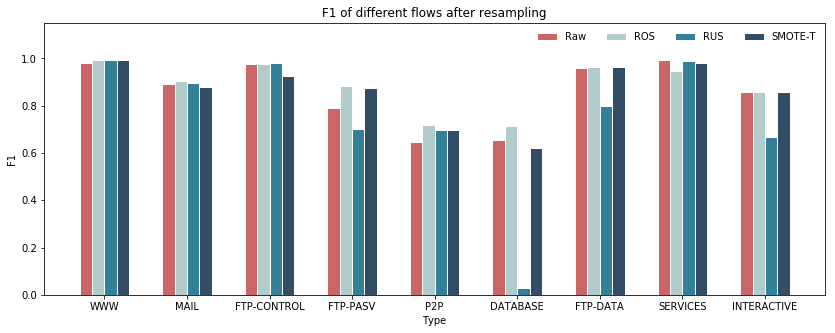

[[0.967485 0.895564 0.985866 0.978678 0.843243 1.       0.941818 0.98374
  1.      ]
 [0.996396 0.922854 0.982517 0.804706 0.656425 1.       0.951941 0.896296
  1.      ]
 [0.990608 0.897708 0.986014 0.751645 0.657658 1.       0.675325 0.975806
  1.      ]
 [0.995605 0.901048 0.884013 0.803614 0.618799 1.       0.942134 0.983333
  1.      ]]
['WWW' 'MAIL' 'FTP-CONTROL' 'FTP-PASV' 'P2P' 'DATABASE' 'FTP-DATA'
 'SERVICES' 'INTERACTIVE']


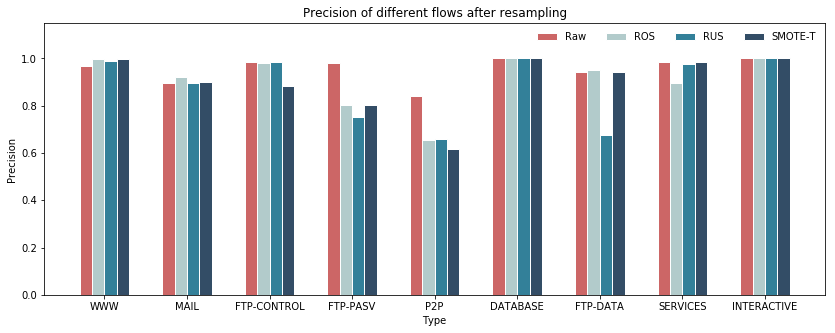

[[0.997756 0.886604 0.965398 0.660432 0.525253 0.484746 0.979206 1.
  0.75    ]
 [0.992691 0.88438  0.972318 0.984173 0.791246 0.555932 0.973535 1.
  0.75    ]
 [0.994037 0.892718 0.975779 0.657554 0.737374 0.013559 0.982987 1.
  0.5     ]
 [0.98769  0.860478 0.975779 0.959712 0.79798  0.450847 0.984877 0.975207
  0.75    ]]
['WWW' 'MAIL' 'FTP-CONTROL' 'FTP-PASV' 'P2P' 'DATABASE' 'FTP-DATA'
 'SERVICES' 'INTERACTIVE']


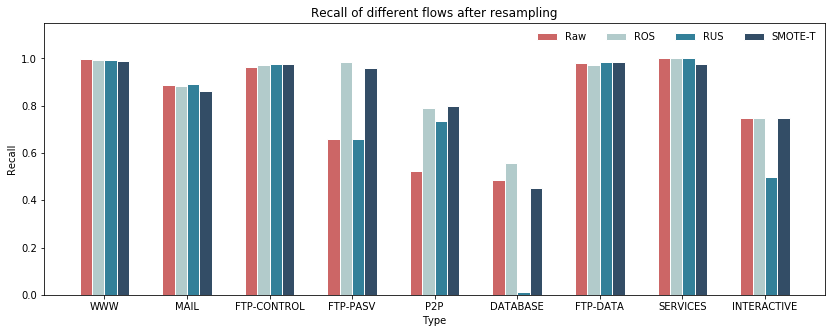

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def plot(metric):

    df = pd.read_csv('lgb_resample_'+metric.lower()+'_comp_after.csv')

    plt.rcParams['savefig.dpi'] = 300
    values = df[df.columns[1:]].loc[[0,1,2,3,5,6,7,9,10]].values.T
    clf_names = df.columns[1:]
    classes =df['Type'].loc[[0,1,2,3,5,6,7,9,10]].values.T
    print(values)
    print(classes)


    fig = plt.figure(figsize=(14,5))

    width = .15
    index = np.arange(len(classes))
    classes

    ax = plt.subplot(1,1,1)
    rects1 = ax.bar(index,values[0],align='center',width=width,
       color=(.8,.4,.4,1),edgecolor='w',linewidth=1,log=False,label='Raw')
    rects2 = ax.bar(index+width,values[1], align='center',width=width,
       color=(.4,.6,.6,.5),edgecolor='w',linewidth=1,log=False,label='ROS')
    rects3 = ax.bar(index+2*width,values[2], align='center',width=width,
       color=(.2,.5,.6,1),edgecolor='w',linewidth=1,log=False,label='RUS')
    rects4 = ax.bar(index+3*width,values[3], align='center',width=width,
       color=(.2,.3,.4,1),edgecolor='w',linewidth=1,log=False,label='SMOTE-T')
    ax.set_ylabel(metric)
    ax.set_xlabel('Type')
    ax.set_ylim(0,1.15)
    ax.legend(loc='best', ncol = 4, frameon = False)
    plt.xticks(index+width*1.5,classes)
    ax.set_title(metric + ' of different flows after resampling')
    def set_values(rects):
        for rect in rects:
            height = rect.get_height()
            plt.text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom',fontsize=8)
            rect.set_edgecolor((.9,.9,1))
    # add values on the top of the bar


    plt.savefig('lgb_resample_'+metric.lower()+'_comp_after.png')
    plt.show()
    # from matplotlib.ticker import MultipleLocator, FormatStrFormatter, NullLocator
    # yformatter = FormatStrFormatter('%1.2f')
    # ylocator = NullLocator()
    # ax.yaxis.set_major_formatter(ymajorLocator)
    # ax.yaxis.set_major_locator(ylocator)

    # set_values(rects1)
    # set_values(rects2)
plot('F1')
plot('Precision')
plot('Recall')